In [14]:
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv")
a=df.drop(columns =['origin', 'name'])
a=pd.DataFrame(a)
a.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

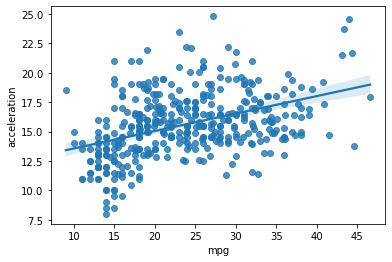

In [16]:

import seaborn as sns
sns.regplot(x='mpg',y='acceleration',data=df)

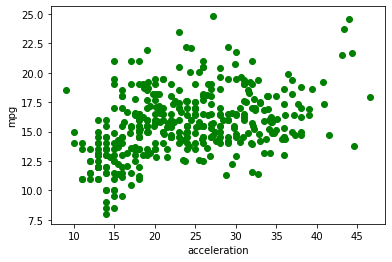

In [17]:
import matplotlib.pyplot as plt
plt.scatter(a['mpg'],a['acceleration'],color='g')
plt.ylabel('mpg')
plt.xlabel('acceleration')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x = np.nan_to_num(x)
y=a['mpg'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
model.coef_

array([-7.87784104e-02,  5.14949823e-03, -4.64506903e-05, -6.97388835e-03,
        9.46683406e-02,  8.01730479e-01])

In [26]:
model.intercept_

-18.737906983764372

In [27]:
pred=model.predict(x_test)
b=pd.DataFrame({'Real':y_test.reshape(-1),'Predict':pred.reshape(-1)})
b.head()

,Real,Predict
0,18.0,22.357875
1,28.1,26.015086
2,19.4,20.000030
3,20.3,25.842101
4,20.2,24.269852


In [28]:
print('Training DataSet: ',model.score(x_train,y_train))
print('Testing: ',model.score(x_test,y_test))
print('Accuracy: ',r2_score(y_test,pred))

Training DataSet:  0.7997344490084487
Testing:  0.8440746906976592
Accuracy:  0.8440746906976592


# Polynomial Regression

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

In [55]:
x_train,x_test,y_train,y_test=train_test_split(a[['displacement']], a['mpg'], test_size=0.25, random_state=101)
xtrain,xtest=pd.DataFrame(x_train),pd.DataFrame(x_test)

In [60]:
xtrain,xtest=pd.DataFrame(x_train),pd.DataFrame(x_test)
poly=PolynomialFeatures(degree=2, include_bias=True)
xptrain, xptest=poly.fit_transform(xtrain), poly.fit_transform(xtest)

In [62]:
model=linear_model.LinearRegression()
model=model.fit(xptrain,y_train)

In [64]:
coefficent=model.coef_
intercept=model.intercept_

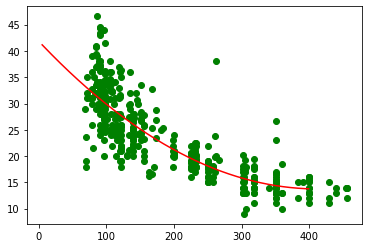

In [74]:
plt.scatter(a['displacement'], a['mpg'],color='g')
x_axis=np.arange(5,400,1)
rsponce=intercept+coefficent[1]*x_axis+coefficent[2]*x_axis**2
plt.plot(x_axis,rsponce, color='r')